
## ESTUDIO DETALLADO DEL ALGORITMO K-NN

## 1. ¿Qué es K-NN?

El **algoritmo K-Nearest Neighbors** es un modelo de aprendizaje supervisado que sirve para **clasificación** o **regresión**. No aprende un modelo explícito, sino que **almacena los datos de entrenamiento** y toma decisiones al momento de hacer predicciones, por eso se llama un **“lazy learner”**.

---

### 2. Funcionamiento básico

#### Entrada:

* Un conjunto de datos etiquetado (dataset de entrenamiento).
* Un punto de prueba sin etiqueta.
* Un valor `k`, que representa cuántos vecinos se considerarán.

#### Procedimiento:

1. Calcular la **distancia** entre el punto de prueba y todos los puntos del dataset de entrenamiento.
2. Elegir los `k` puntos más cercanos (los más "parecidos").
3. Para clasificación:

   * Se asigna la clase más común entre los `k` vecinos.
     Para regresión:
   * Se calcula el promedio de los valores numéricos entre los `k` vecinos.

---

### 3. Métricas de distancia comunes

* **Euclidiana**:

  $$
  d(p,q) = \sqrt{ \sum (p_i - q_i)^2 }
  $$
* **Manhattan**:

  $$
  d(p,q) = \sum |p_i - q_i|
  $$
* **Coseno** (similaridad angular)

Elegir una métrica depende del tipo de datos.



# 4. Visualización del Algoritmo K-Nearest Neighbors (K-NN)

Este ejemplo muestra cómo funciona el algoritmo de **K-vecinos más cercanos (K-NN)** para tareas de clasificación.

**Objetivo**: Dado un punto nuevo, predecir a qué clase pertenece basándonos en los `k` puntos más cercanos del conjunto de entrenamiento.

---
1. Se generan datos artificiales de dos clases.
2. Se entrena un modelo K-NN.
3. Se agrega un nuevo punto sin etiqueta.
4. Se identifican sus `k` vecinos más cercanos.
5. Se visualiza cómo se hace la predicción basada en esos vecinos.

En el gráfico resultante:
- Los puntos de entrenamiento están en azul y rojo.
- El punto nuevo está marcado con una ❌ verde.
- Las líneas punteadas conectan al nuevo punto con sus `k` vecinos.


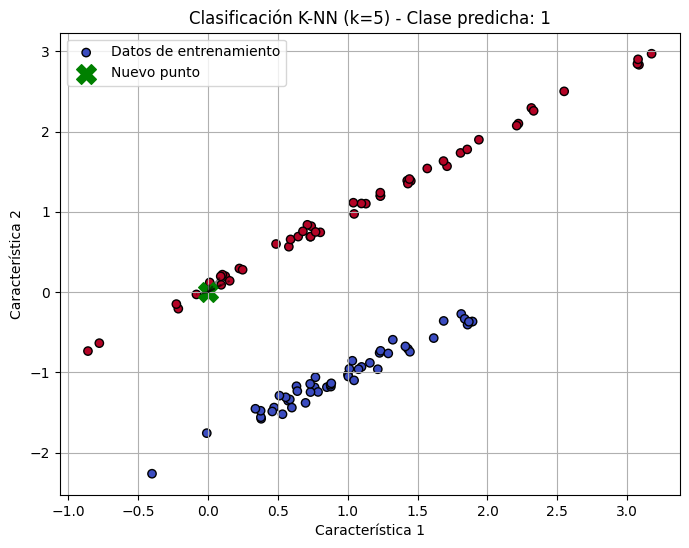

In [1]:
# Importar las librerías necesarias
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Generar un conjunto de datos bidimensional
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    n_classes=2,
    random_state=42
)

# Definir el modelo K-NN con k=5
k = 5
modelo_knn = KNeighborsClassifier(n_neighbors=k)
modelo_knn.fit(X, y)

# Nuevo punto sin etiqueta
nuevo_punto = np.array([[0, 0]])
prediccion = modelo_knn.predict(nuevo_punto)

# Obtener los k vecinos más cercanos
distancias, indices = modelo_knn.kneighbors(nuevo_punto)

# Graficar los datos y la predicción
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', label='Datos de entrenamiento')
plt.scatter(nuevo_punto[0, 0], nuevo_punto[0, 1], c='green', marker='X', s=200, label='Nuevo punto')

# Conectar con líneas a los vecinos más cercanos
for idx in indices[0]:
    plt.plot([nuevo_punto[0, 0], X[idx, 0]], [nuevo_punto[0, 1], X[idx, 1]], 'k--', alpha=0.5)

plt.title(f'Clasificación K-NN (k={k}) - Clase predicha: {prediccion[0]}')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.grid(True)
plt.show()


---

###  5. Implementación básica en Python (Scikit-learn)

```python
from sklearn.neighbors import KNeighborsClassifier

# Entrenamiento
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(X_entrenamiento, y_entrenamiento)

# Predicción
y_pred = modelo.predict(X_prueba)
```

---

###  6. Elección del parámetro `k`

* `k` muy pequeño → Sensible al ruido (overfitting).
* `k` muy grande → Puede perder detalles locales (underfitting).

Usualmente se selecciona con **validación cruzada**.

---

###  7. Preparación de datos

* **Normalización**: importante porque las distancias pueden estar dominadas por variables con escalas mayores.
* **Reducción de dimensiones**: útil en datasets con muchas variables (PCA, t-SNE).
* **Manejo de datos faltantes**: imputación o eliminación.

---

##  EJEMPLO DE APLICACIÓN: SISTEMA DE RECOMENDACIÓN DE PELÍCULAS

### Datos:

* Usuario (edad, género, historial de películas)
* Películas (género, duración, popularidad)

### Implementación:

1. Cada usuario es representado por un vector de características.
2. Se busca a los `k` usuarios más similares.
3. Se recomiendan películas populares entre esos `k`.

### Mejora:

* **Ponderar vecinos por similitud** en gustos.
* **Filtrar por contexto**: solo recomendar estrenos o contenido disponible en la región.

---